# 2.5 - Kepler

https://kepler.gl/

https://eng.uber.com/keplergl/


https://nodejs.org/en/download/

```bash
npm i keplergl-jupyter@0.3.0
```

In [ ]:
%pip install keplergl
%pip install geopandas

In [2]:
import geopandas as gpd

from keplergl import KeplerGl

import numpy as np

In [3]:
mex=gpd.read_file('../data/mexico.geojson')   # cargar datos geoespaciales (multipolygon)

mex.head()

,name,created_at,updated_at,cartodb_id,geometry
0,Baja California,2013-12-01T18:59:38,2013-12-01T18:59:38,6,"MULTIPOLYGON (((-112.66384 28.41883, -112.6654..."
1,Sonora,2013-12-01T18:59:38,2013-12-01T18:59:38,7,"MULTIPOLYGON (((-114.88259 32.49215, -114.8809..."
2,Baja California Sur,2013-12-01T18:59:38,2013-12-01T18:59:38,8,"MULTIPOLYGON (((-112.75825 27.97538, -112.7574..."
3,Zacatecas,2013-12-01T18:59:38,2013-12-01T18:59:38,9,"MULTIPOLYGON (((-101.84881 25.01762, -101.8319..."
4,Durango,2013-12-01T18:59:38,2013-12-01T18:59:38,10,"MULTIPOLYGON (((-105.96732 26.78554, -105.9391..."


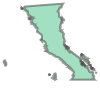

In [4]:
mex.geometry[0]

In [5]:
mex.info(memory_usage='deep')

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   name        32 non-null     object  
 1   created_at  32 non-null     object  
 2   updated_at  32 non-null     object  
 3   cartodb_id  32 non-null     int64   
 4   geometry    32 non-null     geometry
dtypes: geometry(1), int64(1), object(3)
memory usage: 7.6 KB


In [6]:
mex=mex.sort_values(by='name').reset_index()[['name', 'geometry']]  # ordenado por estado

mex.head()

,name,geometry
0,Aguascalientes,"MULTIPOLYGON (((-102.28786 22.41649, -102.2875..."
1,Baja California,"MULTIPOLYGON (((-112.66384 28.41883, -112.6654..."
2,Baja California Sur,"MULTIPOLYGON (((-112.75825 27.97538, -112.7574..."
3,Campeche,"MULTIPOLYGON (((-90.57152 19.82716, -90.57175 ..."
4,Chiapas,"MULTIPOLYGON (((-91.97364 17.91143, -91.96993 ..."


In [7]:
mex=mex.rename(columns={'name':'estado'})

In [8]:
mex

,estado,geometry
0,Aguascalientes,"MULTIPOLYGON (((-102.28786 22.41649, -102.2875..."
1,Baja California,"MULTIPOLYGON (((-112.66384 28.41883, -112.6654..."
2,Baja California Sur,"MULTIPOLYGON (((-112.75825 27.97538, -112.7574..."
3,Campeche,"MULTIPOLYGON (((-90.57152 19.82716, -90.57175 ..."
4,Chiapas,"MULTIPOLYGON (((-91.97364 17.91143, -91.96993 ..."
5,Chihuahua,"MULTIPOLYGON (((-107.65659 31.78371, -107.5998..."
6,Coahuila de Zaragoza,"MULTIPOLYGON (((-102.31079 29.87695, -102.3097..."
7,Colima,"MULTIPOLYGON (((-104.33446 19.02998, -104.3345..."
8,Distrito Federal,"MULTIPOLYGON (((-99.11124 19.56150, -99.11572 ..."
9,Durango,"MULTIPOLYGON (((-105.96732 26.78554, -105.9391..."


In [14]:
mapa_k = KeplerGl(height=600, width=800)   # inicia el mapa

mapa_k.add_data(mex.copy(), 'Mexico')  # se añaden datos y se pone nombre

mapa_k.save_to_html(file_name='mapa_kepler.html')  # guardar

mapa_k   # se pinta

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to mapa_kepler.html!


KeplerGl(data={'Mexico': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, …

In [12]:
config = mapa_k.config

In [13]:
mapa_k2 = KeplerGl(height=600, 
                   width=800, 
                   config=config)   # inicia el mapa


mapa_k2.add_data(mex.copy(), 'Mexico')    # se añaden datos y se pone nombre


mapa_k2.save_to_html(file_name='mapa_kepler.html')  # guardar

mapa_k2   # se pinta

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to mapa_kepler.html!


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': '45q0wlto', 'type':…